In [1]:
# import packages

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import datetime
import functions_hiwi as fct
import warnings
import xarray as xr

C:\Users\illic\AppData\Local\Temp\ipykernel_12740\3037080634.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [91]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=RuntimeWarning)

In [15]:
data_3D = np.arange(60).reshape(3,4,5)

In [16]:
data_3D

array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]],

       [[20, 21, 22, 23, 24],
        [25, 26, 27, 28, 29],
        [30, 31, 32, 33, 34],
        [35, 36, 37, 38, 39]],

       [[40, 41, 42, 43, 44],
        [45, 46, 47, 48, 49],
        [50, 51, 52, 53, 54],
        [55, 56, 57, 58, 59]]])

In [21]:
data_3D.shape

(3, 4, 5)

In [22]:
data_2D = np.linspace(0, 1, 12).reshape(3,4)

In [23]:
data_2D

array([[0.        , 0.09090909, 0.18181818, 0.27272727],
       [0.36363636, 0.45454545, 0.54545455, 0.63636364],
       [0.72727273, 0.81818182, 0.90909091, 1.        ]])

In [24]:
data_2D.shape

(3, 4)

In [4]:
# load dataset
ds = xr.open_dataset(r'C:\Users\illic\Python\data_hiwi\first_example_data.nc')

In [5]:
ds

<xarray.Dataset>
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0
  * y        (y) float64 0.0 1.0 2.0 3.0
  * z        (z) float64 -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int64 ...
    data_2D  (x, y) float64 ...

In [9]:
# data array
da = ds.data_2D

In [10]:
da

<xarray.DataArray 'data_2D' (x: 3, y: 4)>
[12 values with dtype=float64]
Coordinates:
  * x        (x) float64 0.0 1.0 2.0
  * y        (y) float64 0.0 1.0 2.0 3.0

In [ ]:
# create own dataset

In [45]:
# define coordinates
x = np.linspace(0, 2, 3)
y = np.linspace(0, 3, 4)
z = np.linspace(-2, 2, 5)

In [46]:
ds = xr.Dataset(data_vars={'data_3D':(('x', 'y', 'z'), data_3D)}, coords={'x': x, 'y': y, 'z': z})

In [47]:
ds

<xarray.Dataset>
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0
  * y        (y) float64 0.0 1.0 2.0 3.0
  * z        (z) float64 -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int32 0 1 2 3 4 5 6 7 8 9 ... 51 52 53 54 55 56 57 58 59

In [48]:
# add another variable to the dataset
ds['data_2D'] = (('x', 'y'), data_2D)

In [49]:
ds

<xarray.Dataset>
Dimensions:  (x: 3, y: 4, z: 5)
Coordinates:
  * x        (x) float64 0.0 1.0 2.0
  * y        (y) float64 0.0 1.0 2.0 3.0
  * z        (z) float64 -2.0 -1.0 0.0 1.0 2.0
Data variables:
    data_3D  (x, y, z) int32 0 1 2 3 4 5 6 7 8 9 ... 51 52 53 54 55 56 57 58 59
    data_2D  (x, y) float64 0.0 0.09091 0.1818 0.2727 ... 0.8182 0.9091 1.0

In [ ]:
# save dataset
# ds.to_netcdf(r'C:\Users\illic\Python\data_hiwi\first_own_dataset.nc')

In [ ]:
# work with dataset

In [50]:
ds = xr.open_dataset(r'C:\Users\illic\Python\data_hiwi\temp_example.nc')

In [51]:
ds

<xarray.Dataset>
Dimensions:  (time: 79200, obs_id: 3)
Coordinates:
  * time     (time) datetime64[ns] 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'
Data variables:
    temp     (time, obs_id) float64 ...

In [52]:
ds.temp

<xarray.DataArray 'temp' (time: 79200, obs_id: 3)>
[237600 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [55]:
# resample from minutes to hours
hourly_temperature = ds.temp.resample(time='1H', closed='right', label='right').mean(dim='time') # mean(dim='time'), sodass nur mean von time berechnet wird

c:\Users\illic\miniforge3\envs\ts\lib\site-packages\xarray\core\groupby.py:534: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  index_grouper = pd.Grouper(


In [ ]:
hourly_temperature

In [56]:
# resample from minutes to days
daily_temperature = ds.temp.resample(time='1D', closed='right', label='right').mean(dim='time')

In [ ]:
daily_temperature

In [57]:
# select along one dimension
ds.temp.sel(time='2022-01-01 13:00')

<xarray.DataArray 'temp' (obs_id: 3)>
[3 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 2022-01-01T13:00:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [60]:
# select slice
ds.temp.sel(time=slice('2022-01-01 09:00', '2022-01-01 11:00'))

<xarray.DataArray 'temp' (time: 13, obs_id: 3)>
[39 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 2022-01-01T09:00:00 ... 2022-01-01T11:00:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [61]:
ds.temp.sel(time='2022-01-01 13:00', obs_id='B')

<xarray.DataArray 'temp' ()>
[1 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 2022-01-01T13:00:00
    obs_id   <U1 'B'

In [64]:
# select by index
ds.temp.isel(time=0)

<xarray.DataArray 'temp' (obs_id: 3)>
[3 values with dtype=float64]
Coordinates:
    time     datetime64[ns] 2020-07-09
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [65]:
# Basic functions

In [69]:
# mean over time
ds.temp.mean('time')

<xarray.DataArray 'temp' (obs_id: 3)>
array([10.48778754,  9.5961583 , 10.71218939])
Coordinates:
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [70]:
# max temp
ds.temp.max('time')

<xarray.DataArray 'temp' (obs_id: 3)>
array([34.8, 33.4, 36.2])
Coordinates:
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [71]:
# min temp
ds.temp.min('time')

<xarray.DataArray 'temp' (obs_id: 3)>
array([-16.6, -13.8, -12.4])
Coordinates:
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [72]:
# Search by conditin

In [75]:
# define condition
cond = ds.temp < 5

In [76]:
# select using where (set to NaN if condition is not met)
ds.temp.where(cond)

<xarray.DataArray 'temp' (time: 79200, obs_id: 3)>
array([[nan, nan, nan],
       [nan, nan, nan],
       [nan, nan, nan],
       ...,
       [3.3, 0.1, 1.5],
       [3.3, 0.3, 1.4],
       [3.4, 0.4, 1.4]])
Coordinates:
  * time     (time) datetime64[ns] 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [77]:
# select using where (delete if condition is not met)
ds.temp.where(cond, drop=True)

<xarray.DataArray 'temp' (time: 30868, obs_id: 3)>
array([[4.9, nan, nan],
       [4.6, nan, nan],
       [4.6, nan, nan],
       ...,
       [3.3, 0.1, 1.5],
       [3.3, 0.3, 1.4],
       [3.4, 0.4, 1.4]])
Coordinates:
  * time     (time) datetime64[ns] 2020-09-18T00:20:00 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'

In [78]:
# Plotting

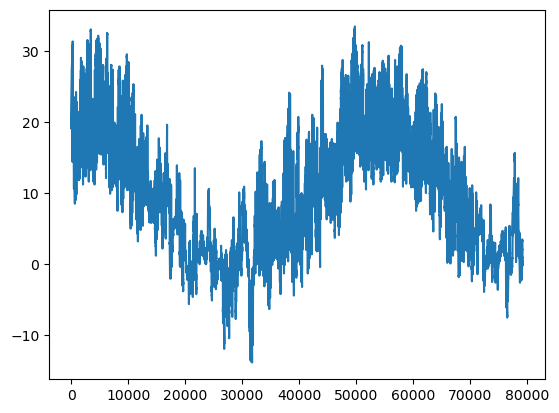

In [82]:
# with Matplotlib
fig, ax = plt.subplots()
ax.plot(ds.temp.sel(obs_id='B'))

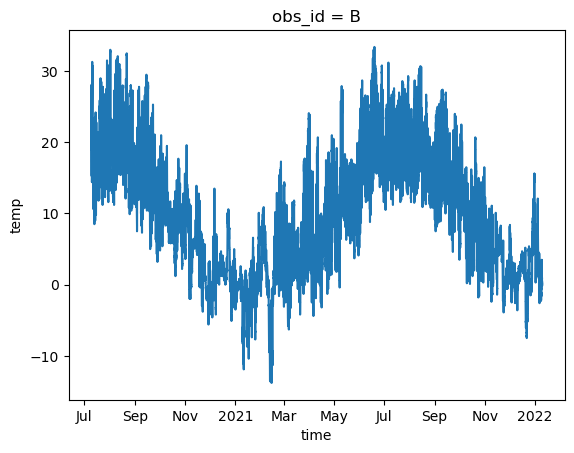

In [86]:
# with Xarray
fig, ax = plt.subplots()
ds.temp.sel(obs_id='B').plot.line(ax=ax)

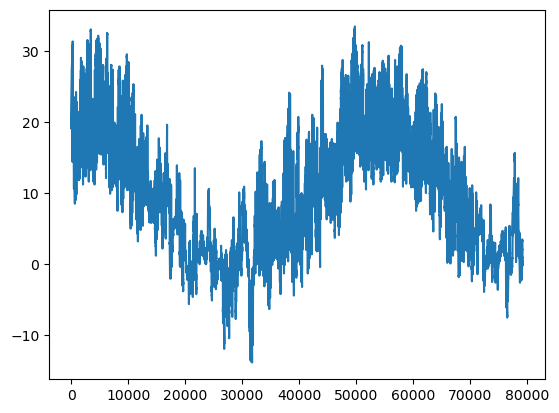

In [88]:
plt.plot(ds.temp.sel(obs_id='B'))

In [89]:
# Transform to numpy objects
ds.temp.values

array([[13.3,  nan, 15.6],
       [13.4,  nan, 15.6],
       [13.3,  nan, 15.6],
       ...,
       [ 3.3,  0.1,  1.5],
       [ 3.3,  0.3,  1.4],
       [ 3.4,  0.4,  1.4]])

In [90]:
# Missing values
ds.temp.isnull()

<xarray.DataArray 'temp' (time: 79200, obs_id: 3)>
array([[False,  True, False],
       [False,  True, False],
       [False,  True, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])
Coordinates:
  * time     (time) datetime64[ns] 2020-07-09 ... 2022-01-09T23:50:00
  * obs_id   (obs_id) <U1 'A' 'B' 'C'